In [1]:
%matplotlib inline
from vic.dataloader import (
    load_orl,
    load_yale,
    make_fixed_test_indices,
    split_with_fixed_test,
)
from vic.models import LBPH
from vic.metrics import get_metrics_vs_train_size, get_average_acc_vs_train_size
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# ORL Dataset Experiments

In [ ]:
data = load_orl("../data/ORL")
max_idx = max(data.keys())
min_length = min(len(images) for images in data.values())
print(f"Loaded ORL dataset with {max_idx} subjects with at least {min_length} images each.")

Loaded ORL dataset with 40 subjects with at least 10 images each.


In [3]:
model = LBPH()
n_test = 3
train_sizes = np.arange(1, min_length - n_test + 1)
test_idx, pool_idx = make_fixed_test_indices(data, n_test=n_test, seed=0)
print(f"Evaluating LBPH on ORL dataset with train sizes: {train_sizes}")
accuracy_scores, conf_matrices = get_metrics_vs_train_size(
    model, train_sizes, data, test_idx, pool_idx, seed=0
)

Evaluating LBPH on ORL dataset with train sizes: [1 2 3 4 5 6 7]


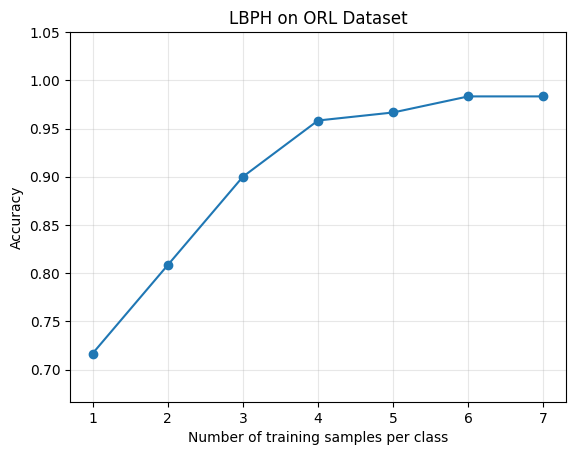

In [4]:
fig = plt.figure()
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("LBPH on ORL Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()

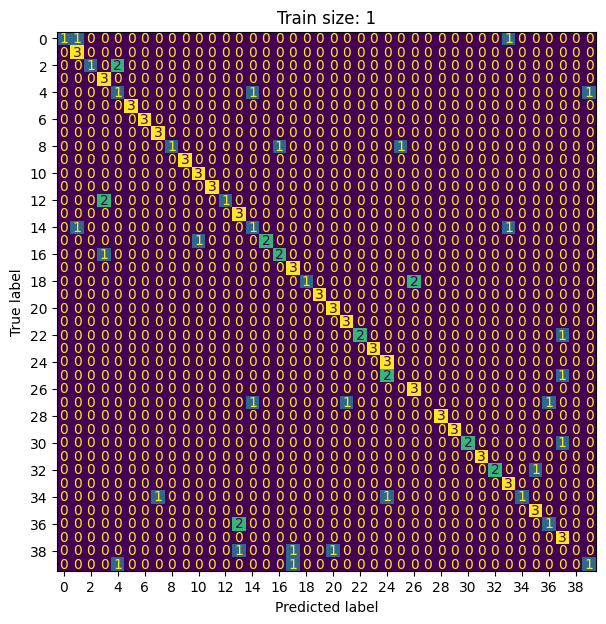

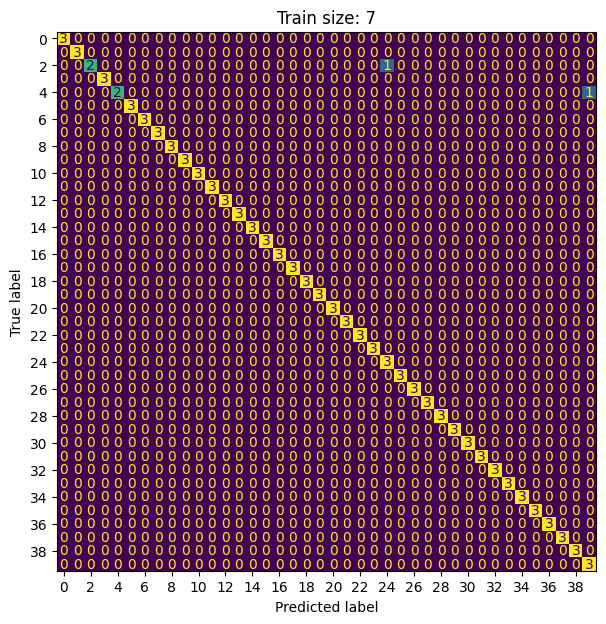

In [5]:
sizes_to_plot = [1, 7]

for i, size in enumerate(sizes_to_plot):
    cm = conf_matrices[size]

    fig, ax = plt.subplots(figsize=(7, 7))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(colorbar=False, ax=ax)

    ax.set_xticks(np.arange(0, 40, 2))
    ax.set_yticks(np.arange(0, 40, 2))

    plt.title(f"Train size: {size}")
    plt.show()

In [ ]:
# n_exp = 3
# mean_scores, std_scores = get_average_acc_vs_train_size(
#     model, train_sizes, data, test_idx, pool_idx, n_exp=n_exp, seed_master=0
# )

In [ ]:
# sorted_sizes = sorted(mean_scores.keys())
# means = np.array([mean_scores[k] for k in sorted_sizes])
# stds = np.array([std_scores[k] for k in sorted_sizes])
# ci = 1.96 * stds / np.sqrt(n_exp)

# fig = plt.figure(figsize=(10, 8))

# plt.plot(sorted_sizes, means, marker="o", color="tab:blue", label="Mean Accuracy")

# plt.fill_between(
#     sorted_sizes,
#     means - ci,
#     means + ci,
#     alpha=0.1,
#     color="tab:blue",
#     label="95% Confidence Interval",
# )

# plt.title("LBPH on ORL Dataset")
# plt.xlabel("Number of training samples per class")
# plt.ylabel("Accuracy")

# plt.xticks(sorted_sizes)

# plt.grid(True, alpha=0.3)
# plt.legend(loc="lower right")

# y_min = max(0, min(means - stds) - 0.05)
# plt.ylim(y_min, 1.05)

# plt.show()

# Yale Dataset Experiments

In [ ]:
data = load_yale("../data/Yale")
max_idx = max(data.keys())
min_length = min(len(images) for images in data.values())
print(f"Loaded ORL dataset with {max_idx} subjects with at least {min_length} images each.")

Loaded ORL dataset with 15 subjects with at least 11 images each.


In [7]:
model = LBPH()
n_test = 3
train_sizes = np.arange(1, min_length - n_test + 1)
test_idx, pool_idx = make_fixed_test_indices(data, n_test=n_test, seed=0)
print(f"Evaluating LBPH on Yale dataset with train sizes {train_sizes}")
accuracy_scores, conf_matrices = get_metrics_vs_train_size(
    model, train_sizes, data, test_idx, pool_idx, seed=0
)

Evaluating LBPH on Yale dataset with train sizes [1 2 3 4 5 6 7 8]


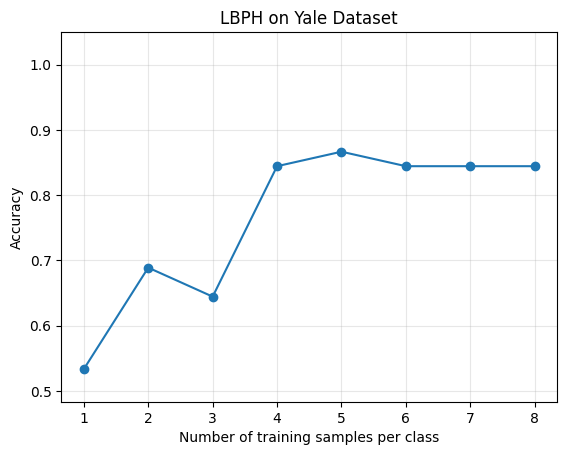

In [8]:
fig = plt.figure()
plt.plot(train_sizes, accuracy_scores.values(), marker="o")
plt.title("LBPH on Yale Dataset")
plt.xlabel("Number of training samples per class")
plt.ylabel("Accuracy")
plt.xticks(train_sizes)
plt.grid(True, alpha=0.3)
plt.ylim(min(accuracy_scores.values()) - 0.05, 1.05)
plt.show()

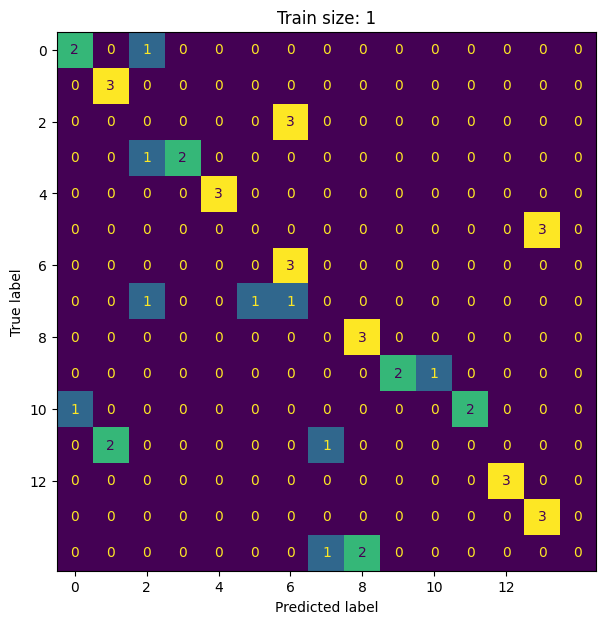

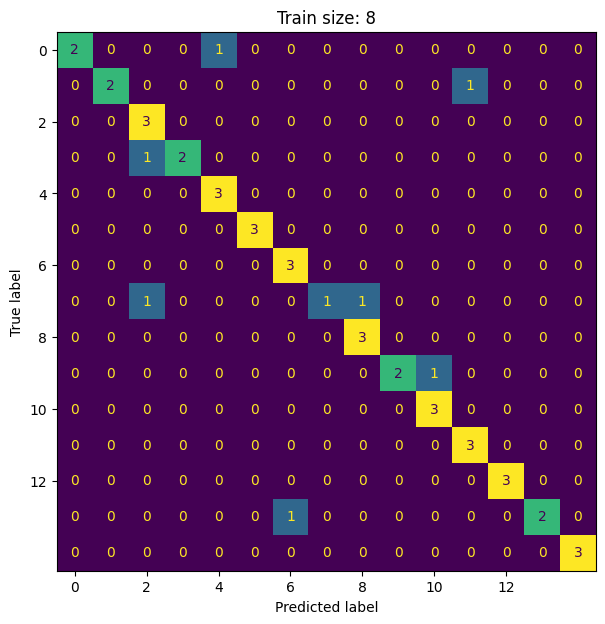

In [9]:
sizes_to_plot = [1, 8]

for i, size in enumerate(sizes_to_plot):
    cm = conf_matrices[size]

    fig, ax = plt.subplots(figsize=(7, 7))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(colorbar=False, ax=ax)

    ax.set_xticks(np.arange(0, 14, 2))
    ax.set_yticks(np.arange(0, 14, 2))

    plt.title(f"Train size: {size}")
    plt.show()